# Naive Bayes Gaussiano

Importamos el dataset

In [1]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml(name="Fashion-MNIST")
data, labels = fashion_mnist.data, fashion_mnist.target
# Definición de las clases
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

c:\MUIARFID\RFA\rfa_projects\.venv\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Partición de los datos

In [2]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=42)

SVD

In [3]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
data_train_mean = np.mean(data_train, axis=0)
data_train_mean_normalized = data_train - data_train_mean
data_test_mean_normalized = data_test - data_train_mean
svd = TruncatedSVD(n_components=50)
Xr_train = svd.fit_transform(data_train_mean_normalized)
Xr_test = svd.transform(data_test_mean_normalized)

Tasa de acierto en función del número de componentes

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time, sys

K = 50
acc = np.empty(K)
trtimes = np.empty(K)
acc[0] = 0.0; trtimes[0] = 0.0

for k in np.arange(1, K):
    start_time = time.time()
    gnb_model = GaussianNB()
    gnb_model.fit(Xr_train[:, :k], labels_train)
    trtimes[k] = time.time() - start_time

    y_pred_gnb = gnb_model.predict(Xr_test[:, :k])
    acc[k] = accuracy_score(labels_test, y_pred_gnb) * 100
    sys.stdout.write("\rk = %d, acc = %.2f%%, time = %.2fs" % (k, acc[k], trtimes[k]))
    sys.stdout.flush()

k = 49, acc = 77.86%, time = 0.09s

Gráfica precisión respecto al número de componentes

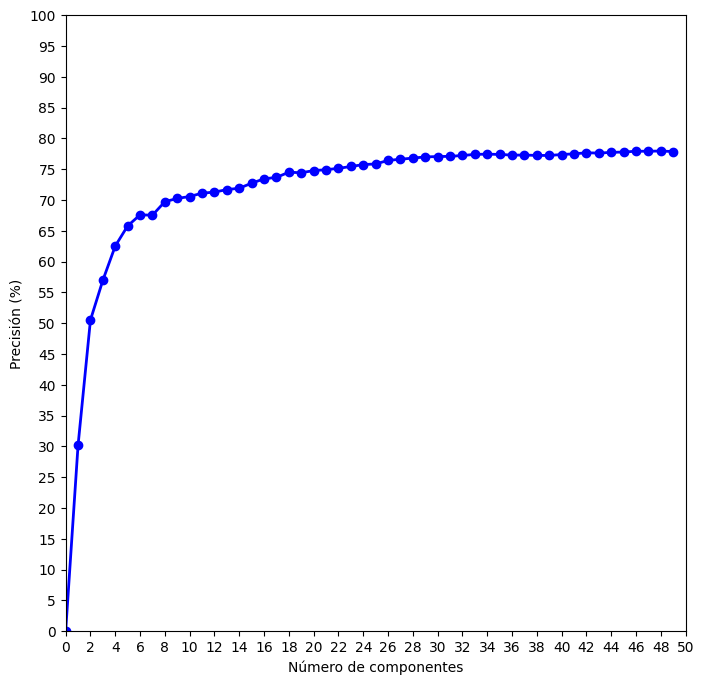

In [45]:
plt.figure(1, figsize=(8, 8))
plt.axis([0, K, 0, 100])
plt.plot(acc, '-bo', linewidth=2)
plt.xlabel('Número de componentes')
plt.ylabel('Precisión (%)')
plt.xticks(np.arange(0, K+1, 2))
plt.yticks(np.arange(0, 101, 5))
plt.show()

Gráfica tiempo de entrenamiento respecto al número de componentes

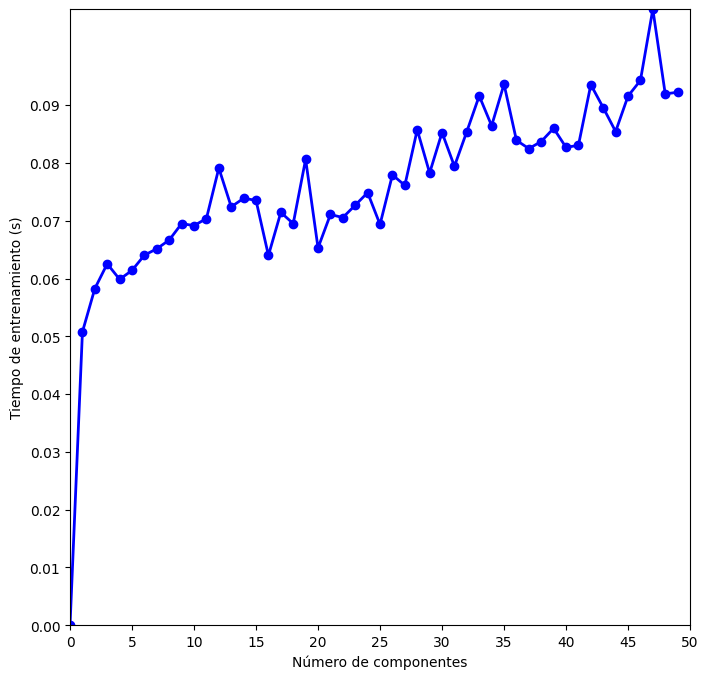

In [46]:
plt.figure(1, figsize=(8, 8))
plt.axis([0, K, 0, np.max(trtimes)])
plt.plot(trtimes, '-bo', linewidth=2)
plt.xlabel('Número de componentes')
plt.ylabel('Tiempo de entrenamiento (s)')
plt.xticks(np.arange(0, K+1, K / 10))
plt.yticks(np.arange(0, 0.1, 0.01))
plt.show()

Elección de una complejidad dimensional

In [47]:
import math
acc_increments = [acc[i] - acc[i-1] for i in range(1, K)]
acc_increments = [math.inf if i < 0 else i for i in acc_increments]
threshold = 1.0
elbow_point = next(i for i, v in enumerate(acc_increments) if v < threshold)
print(f"Punto de codo en {elbow_point + 1} componentes.")

Punto de codo en 9 componentes.


Matriz de confusión detallada

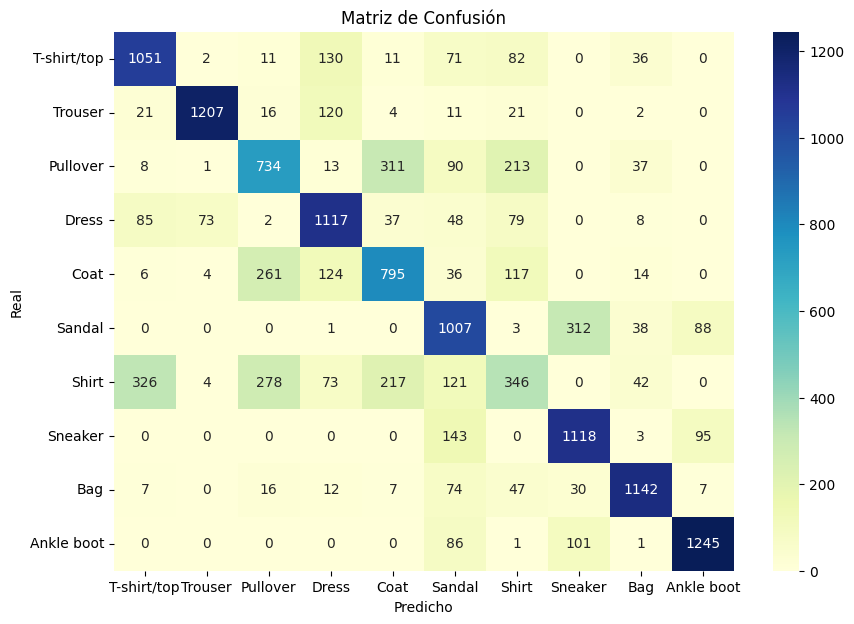

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

gnb_model = GaussianNB()
gnb_model.fit(Xr_train[:, :elbow_point], labels_train)
y_pred_elbow = gnb_model.predict(Xr_test[:, :elbow_point])
conf_matrix = confusion_matrix(labels_test, y_pred_elbow)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="g",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()